### Question 1
Introduction:
Special thanks to: https://github.com/justmarkham for sharing the dataset and
materials.

Occupations

Step 1. Import the necessary libraries

Step 2. Import the dataset from this address.

Step 3. Assign it to a variable called users



In [1]:
import pandas as pd
url='https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'
users = pd.read_csv(url, delimiter='|')
headers=['userId','age','gender','occupation','zipcode']
users.columns=headers
users.head()

,userId,age,gender,occupation,zipcode
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


Step 4. Discover what is the mean age per occupation

In [2]:
users.groupby('occupation')[['age']].mean()

,age
occupation,
administrator,38.746835
artist,31.392857
doctor,43.571429
educator,42.010526
engineer,36.388060
entertainment,29.222222
executive,38.718750
healthcare,41.562500
homemaker,32.571429


Step 5. Discover the Male ratio per occupation and sort it from the most to the least

In [9]:
genderM=users[users['gender']=='M']

male = genderM.groupby('occupation')[['gender']].count()
all =  users.groupby('occupation')[['gender']].count()
all['male']=male
all['male ratio']=(all['male']/all['gender'])

all.sort_values('male ratio',ascending=False)[['male ratio']]

,male ratio
occupation,
doctor,1.000000
engineer,0.970149
technician,0.962963
retired,0.928571
programmer,0.909091
executive,0.906250
scientist,0.903226
entertainment,0.888889
lawyer,0.833333


Step 6. For each occupation, calculate the minimum and maximum ages

In [12]:
age =  round(users.groupby('occupation')[['age']].mean())
age['min age'] =  users.groupby('occupation')[['age']].min()
age['max age'] =  users.groupby('occupation')[['age']].max()
age[['min age','max age']]

,min age,max age
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


Step 7. For each combination of occupation and sex, calculate the mean age

In [13]:
com =round(users.groupby(['occupation','gender'])[['age']].mean())
com

age
occupation    gender      
administrator F       41.0
              M       37.0
artist        F       30.0
              M       32.0
doctor        M       44.0
educator      F       39.0
              M       43.0
engineer      F       30.0
              M       37.0
entertainment F       31.0
              M       29.0
executive     F       44.0
              M       38.0
healthcare    F       40.0
              M       45.0
homemaker     F       34.0
              M       23.0
lawyer        F       40.0
              M       36.0
librarian     F       40.0
              M       40.0
marketing     F       37.0
              M       38.0
none          F       36.0
              M       19.0
other         F       35.0
              M       34.0
programmer    F       32.0
              M       33.0
retired       F       70.0
              M       63.0
salesman      F       27.0
              M       39.0
scientist     F       28.0
              M       36.0
student       F       21.0
              M       23.0
technician    F       38.0
              M       33.0
writer        F       38.0
              M       35.0

Step 8. For each occupation present the percentage of women and men

In [14]:
genderM=users[users['gender']=='M']
genderF=users[users['gender']=='F']

male = genderM.groupby('occupation')[['gender']].count()
female = genderF.groupby('occupation')[['gender']].count()

all =  users.groupby('occupation')[['gender']].count()
all['male'] = male
all['female'] = female
all['male percentage']=round((all['male']/all['gender'])*100)
all['female percentage']=round((all['female']/all['gender'])*100)

all[['male percentage','female percentage']]



,male percentage,female percentage
occupation,,
administrator,54.0,46.0
artist,54.0,46.0
doctor,100.0,NaN
educator,73.0,27.0
engineer,97.0,3.0
entertainment,89.0,11.0
executive,91.0,9.0
healthcare,31.0,69.0
homemaker,14.0,86.0


### Question 2
Euro Teams

Step 1. Import the necessary libraries

Step 2. Import the dataset from this address

Step 3. Assign it to a variable called euro12

In [1]:
import pandas as pd
url="https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"
euro12 = pd.read_csv(url, delimiter=',')
headers=['Team','Goals','Shots on target','Shots off target','Shooting Accuracy','Goals-to-shots','Total shots','Hit Woodwork','Penalty goals','Penalties not scored','Headed goals','Passes','Passes completed','Passing Accuracy','Touches','Crosses','Dribbles','Corners Taken','Tackles','Clearances','Interceptions','Clearances off line','Clean Sheets','Blocks','Goals conceded','Saves made','Saves-to-shots ratio','Fouls Won','Fouls Conceded','Offsides','Yellow Cards','Red Cards','Subs on','Subs off','Players Used']
euro12.columns=headers
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,Goals-to-shots,Total shots,Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


Step 4. Select only the Goal column

In [2]:
euro12['Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

Step 5. How many team participated in the Euro2012?

Step 5. How many team participated in the Euro2012

In [4]:
euro12['Team'].nunique()

16

Step 6. What is the number of columns in the dataset?

In [6]:
len(euro12.columns)

35

Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them
to a dataframe called discipline

In [7]:
discipline = euro12[['Team','Yellow Cards','Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


Step 8. Sort the teams by Red Cards, then to Yellow Cards

In [8]:
discipline.sort_values('Red Cards')

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
7,Italy,16,0
8,Netherlands,5,0
10,Portugal,12,0
12,Russia,6,0


In [9]:
discipline.sort_values('Yellow Cards')

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
11,Republic of Ireland,6,1
12,Russia,6,0
1,Czech Republic,7,0
9,Poland,7,1


Step 9. Calculate the mean Yellow Cards given per Team

In [10]:
euro12.groupby('Team')[['Yellow Cards']].mean()

,Yellow Cards
Team,
Croatia,9
Czech Republic,7
Denmark,4
England,5
France,6
Germany,4
Greece,9
Italy,16
Netherlands,5


Step 10. Filter teams that scored more than 6 goals


In [11]:
euro12[euro12['Goals']>6][['Team','Goals']]

,Team,Goals
5,Germany,10
13,Spain,12


Step 11. Select the teams that start with G



In [13]:
G=euro12['Team'].str.startswith('G')
euro12[G]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,Goals-to-shots,Total shots,Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


Step 12. Select the first 7 columns

In [14]:
euro12.iloc[:,:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,Goals-to-shots,Total shots
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


Step 13. Select all columns except the last 3

In [15]:
euro12.iloc[:,:-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,Goals-to-shots,Total shots,Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [16]:
search_values = ['Russia','England','Italy']
wer = euro12[euro12.Team.str.contains('|'.join(search_values ))]
wer[['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


### Question 3
Housing


Step 1. Import the necessary libraries

Step 2. Create 3 differents Series, each of length 100, as follows:

    • The first a random number from 1 to 4

    • The second a random number from 1 to 3

    • The third a random number from 10,000 to 30,000


In [18]:
from numpy import random
import numpy as np
import pandas as pd

x = random.choice([1,2,3,4], size=(100))
y = random.choice([1,2,3], size=(100))
z = np.random.randint(low=10000, high=30000, size=100)


Step 3. Create a DataFrame by joinning the Series by column

In [19]:
dff = pd.DataFrame(data=zip(x,y,z),columns=['list1','list2','list3'])
dff.head()

,list1,list2,list3
0,2,3,22234
1,3,2,28464
2,4,1,22981
3,2,1,27308
4,3,3,10581


Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter


In [21]:
dff.columns=['bedrs','bathrs','price_sqr_meter']
dff

,bedrs,bathrs,price_sqr_meter
0,2,3,22234
1,3,2,28464
2,4,1,22981
3,2,1,27308
4,3,3,10581
...,...,...,...
95,1,1,16075
96,1,3,12193
97,1,2,28402
98,3,2,10579


Step 5. Create a one column DataFrame with the values of the 3 Series and assign it
to 'bigcolumn'

In [22]:
bigcolumn =dff.apply(lambda x:'%s_%s_%s' % (x['bedrs'],x['bathrs'],x['price_sqr_meter']),axis=1)
bigcolumn

0     2_3_22234
1     3_2_28464
2     4_1_22981
3     2_1_27308
4     3_3_10581
        ...    
95    1_1_16075
96    1_3_12193
97    1_2_28402
98    3_2_10579
99    3_2_16431
Length: 100, dtype: object

Step 6. Ops it seems it is going only until index 99. Is it true?

Yes

### Question 4
Wind Statistics

The data have been modified to contain some missing values, identified by NaN.
Using pandas should make this exercise easier, in particular for the bonus question.

You should be able to perform all of these operations without using a for loop or
other looping construct.

The first three columns are year, month, and day. The remaining 12 columns are
average windspeeds in knots at 12 locations in Ireland on that day.

Step 1. Import the necessary libraries

Step 2. Import the dataset from this address

Step 3. Assign it to a variable called data and replace the first 3 columns by a proper
datetime index.

Step 4. Year 2061? Do we really have data from this year? Create a function to fix it
and apply it.

In [41]:
import pandas as pd

url='https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data'
data = pd.read_table(url, delimiter='\s+' )
headers=['Yr','Mo','Dy','RPT','VAL','ROS','KIL','SHA','BIR','DUB','CLA','MUL','CLO','BEL','MAL']
data.columns=headers
data.head()

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [42]:
def century(x):
    return x + 1900

data['Yr'] = data['Yr'].apply(century)
data['Date'] = pd.to_datetime(data[['Yr', 'Mo', 'Dy']].astype(str).agg('-'.join, axis=1))

data=data.drop(columns=['Yr', 'Mo','Dy'])
data


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,Date
0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01
1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,1961-01-02
2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,1961-01-03
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,1961-01-04
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,1961-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08,1978-12-27
6570,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46,1978-12-28
6571,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58,1978-12-29
6572,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79,1978-12-30


Step 5. Set the right dates as the index. Pay attention at the data type, it should be
datetime64[ns].

In [36]:
data['Date']

0      1961-01-01
1      1961-01-02
2      1961-01-03
3      1961-01-04
4      1961-01-05
          ...    
6569   1978-12-27
6570   1978-12-28
6571   1978-12-29
6572   1978-12-30
6573   1978-12-31
Name: Date, Length: 6574, dtype: datetime64[ns]

In [44]:
data=data.set_index('Date')
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


Step 6. Compute how many values are missing for each location over the entire
record.They should be ignored in all calculations below.

In [45]:
datanull = data[data.isnull().any(axis=1)]
datanull

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-18,19.83,12.04,20.79,18.54,NaN,10.29,17.83,11.38,14.67,16.71,8.79,17.96
1961-01-29,NaN,23.91,22.29,17.54,24.08,19.70,22.00,20.25,21.46,19.95,27.71,23.38
1961-02-19,16.17,15.59,13.70,NaN,13.50,10.96,9.62,11.83,11.58,13.67,29.63,20.54
1961-02-28,12.92,12.75,NaN,8.92,16.13,12.29,14.75,14.46,13.96,14.04,18.41,13.17
1961-03-01,12.67,13.13,11.79,6.42,9.79,8.54,10.25,13.29,NaN,12.21,20.62,NaN
1961-03-12,NaN,13.88,16.38,10.25,14.92,13.67,17.12,13.70,16.29,15.79,20.50,22.54


In [46]:
len(datanull)

28

Step 7. Compute how many non-missing values there are in total

In [49]:
datanew = data.dropna()
datanew.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
1961-01-06,13.21,8.12,9.96,6.67,5.37,4.50,10.67,4.42,7.17,7.50,8.12,13.17
1961-01-07,13.50,14.29,9.50,4.96,12.29,8.33,9.17,9.29,7.58,7.96,13.96,13.79
1961-01-08,10.96,9.75,7.62,5.91,9.62,7.29,14.29,7.62,9.25,10.46,16.62,16.46


In [50]:
len(datanew)

6546

Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and
all the times.
A single number for the entire dataset

In [52]:
datanew.mean().mean()

10.222465245951712

### Question 5
Step 1. Import the necessary libraries

Step 2. Import the dataset from this address.

Step 3. Assign it to a variable called chipo.

Step 4. See the first 10 entries

In [53]:
import pandas as pd

url='https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, sep='\t')
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


Step 5. What is the number of observations in the dataset?

In [54]:
len(chipo)

4622

Step 6. What is the number of columns in the dataset?

In [55]:
len(chipo.columns)

5

Step 7. Print the name of all the columns.

In [56]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

Step 10. For the most-ordered item, how many items were ordered?

In [58]:
chipo['item_name'].value_counts().idxmax()

'Chicken Bowl'

In [63]:
chipo['item_name'].value_counts()[:1]

Chicken Bowl    726
Name: item_name, dtype: int64

Step 11. What was the most ordered item in the choice_description column?
Step 12. How many items were orderd in total?

In [61]:
chipo['choice_description'].value_counts().idxmax()

'[Diet Coke]'

In [65]:
chipo['choice_description'].value_counts()[:1]

[Diet Coke]    134
Name: choice_description, dtype: int64

Step 13.
• Turn the item price into a float

• Check the item price type

• Create a lambda function and change the type of item price

• Check the item price type

In [73]:
chipo.item_price.dtype

dtype('O')

In [82]:
chipo['item_price'] = chipo['item_price'].apply(lambda x: x.replace('$', '').replace(',', '')).astype('float64')

In [83]:
chipo.dtypes

order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object

Step 14. How much was the revenue for the period in the dataset?

In [91]:
chipo['item_price'].sum()

34500.16

In [66]:
chipo.sum()

order_id                                                4285772
quantity                                                   4972
item_name     Chips and Fresh Tomato SalsaIzzeNantucket Nect...
item_price    $2.39 $3.39 $3.39 $2.39 $16.98 $10.98 $1.69 $1...
dtype: object

Step 15. How many orders were made in the period?

In [93]:
chipo['order_id'].nunique()

1834

Step 16. What is the average revenue amount per order?

In [95]:
chipo.groupby('order_id')[['item_price']].mean().mean()

item_price    7.841911
dtype: float64

Step 17. How many different items are sold?


In [99]:
chipo['item_name'].nunique()      #len(chipo['item_name'].unique())

50

### Question 6
Create a line plot showing the number of marriages and divorces per capita in the
U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!

In [100]:
import pandas as pd

data = pd.read_csv("us_marriage.csv") 
data.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


Text(0.5, 1.0, 'number of marriages and divorces per capita in the U.S\u200b \n 1867 - 2014')

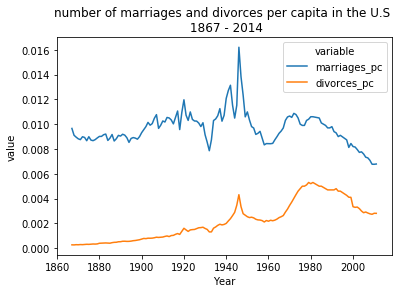

In [105]:
import seaborn as sns

data['marriages_pc'] = data['Marriages']/data['Population']     #to calculate marriages per capita
data["divorces_pc"]  = data['Divorces']/data['Population']      #to calculate divorces per capita

data2 = data[['Year','marriages_pc','divorces_pc']]                #using required attributes only
data2 = data2.loc[(data2['Year']>=1867)&(data2['Year']<=2014)]    #between 1867 & 2014

ax = sns.lineplot('Year', 'value', hue='variable',
             data=pd.melt(data2, 'Year'))
ax.set_title('number of marriages and divorces per capita in the U.S​ \n 1867 - 2014')

### Question 7
Create a vertical bar chart comparing the number of marriages and divorces per
capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

Text(0.5, 1.0, 'Comparing number of marriages and divorces per capita in the U.S \n Between 1900, 1950 & 2000')

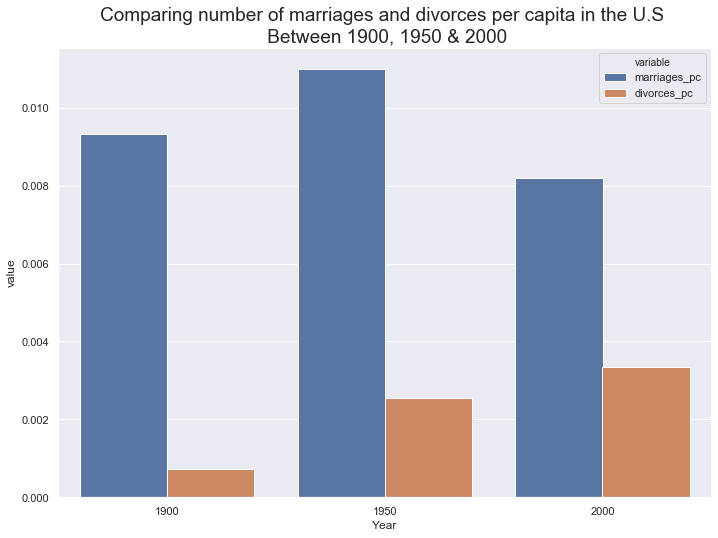

In [112]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

data3 = data2.iloc[[33,83,133],:]                #selecting the required rows 1900, 1950 & 2000

ax = sns.barplot(x="Year", y="value", hue="variable",
                data=pd.melt(data3, 'Year'))

ax.set_title('Comparing number of marriages and divorces per capita in the U.S \n Between 1900, 1950 & 2000', fontsize=19)

### Question 8
Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort
the actors by their kill count and label each bar with the corresponding actor's name.
Don't forget to label your axes!

Text(0.5, 1.0, 'Deadliest actors in Hollywood')

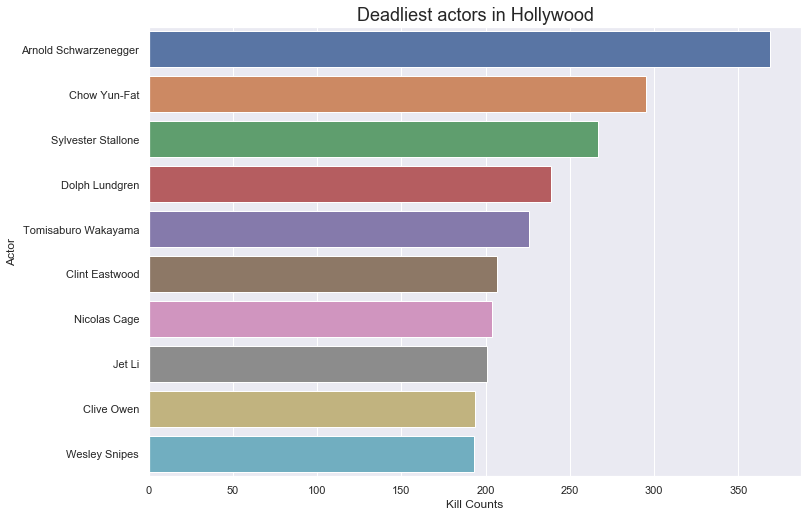

In [113]:
import pandas as pd

act = pd.read_csv('actor_kill_counts.csv')

ax1 = sns.barplot(x='Count', y='Actor', data=act, order=act.sort_values('Count', ascending=False).Actor)
ax1.set_xlabel('Kill Counts')
ax1.set_ylabel('Actor')
ax1.set_title("Deadliest actors in Hollywood", size=18)

### Question 9
Create a pie chart showing the fraction of all Roman Emperors that were
assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the
percentage breakdown of the categories.

In [116]:
import pandas as pd
import matplotlib.pyplot as plt

rom = pd.read_csv('roman-emperor.csv')
rom_as= rom.loc[(rom['Cause_of_Death']=='Assassinated')]

rom_as



,Emperor,Length_of_Reign,Cause_of_Death
2,Caligula,4.83,Assassinated
5,Galba,0.58,Assassinated
7,Vitellius,0.67,Assassinated
10,Domitian,15.00,Assassinated
17,Commodus,15.00,Assassinated
18,Pertinax,0.25,Assassinated
21,Caracalla,19.00,Assassinated
22,Geta,3.00,Assassinated
24,Elagabalus,3.75,Assassinated
25,Severus Alexander,13.00,Assassinated


Text(0.5, 1.0, "Emperor's of Roman Empire 'Assassinated' \n with length of their region(relative)")

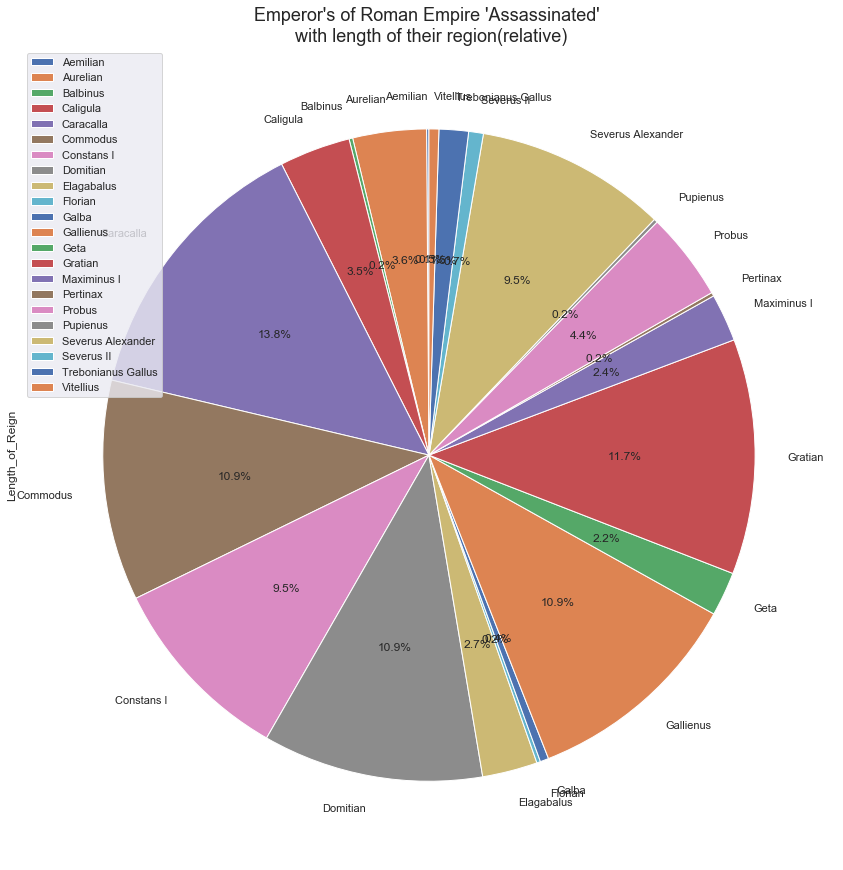

In [117]:
rom_as.groupby(['Emperor']).sum().plot(kind='pie', subplots=True,startangle=90,figsize=(20,15), autopct='%1.1f%%')
plt.title("Emperor's of Roman Empire 'Assassinated' \n with length of their region(relative)", fontsize=18)

### Question 10
Create a scatter plot showing the relationship between the total revenue earned by
arcades and the number of Computer Science PhDs awarded in the U.S. between
2000 and 2009.
Don't forget to label your axes!
Color each dot according to its year.

Text(0.5, 1, 'Relationship between the total revenue earned by arcades\nAnd the number of Computer Science PhDs awarded in the U.S.\n 2000 - 2009')

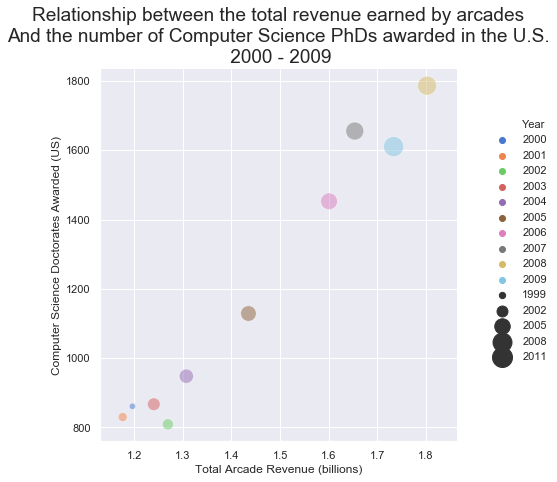

In [122]:
arc=pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')

arc1= arc.loc[(arc['Year']>=2000)&(arc['Year']<=2009)]

ss= sns.relplot(x="Total Arcade Revenue (billions)", y="Computer Science Doctorates Awarded (US)", hue="Year", size="Year",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=arc)
plt.title("Relationship between the total revenue earned by arcades\nAnd the number of Computer Science PhDs awarded in the U.S.\n 2000 - 2009", fontsize=19)